# Machine Learning and Data Mining: Lab 05
---------------

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('ratings_small.csv')
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


---
## Exercise 1: Explore the Ratings of Movies
The dataframe `df` contains ratings of different users. First, we explore the data.

#### Task (a) Print the highest rating and the lowest rating

In [31]:
dfRating = df['rating']
max_Value = dfRating.max()
min_Value = dfRating.min()
print('Max value of Rating is: ', max_Value)
print('Min value of Rating is: ', min_Value)

Max value of Rating is:  5.0
Min value of Rating is:  0.5


#### Task (b) Plot the distribution of the ratings

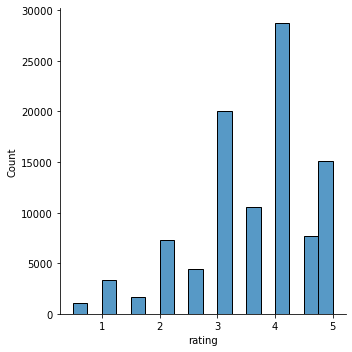

In [32]:
sns.displot(dfRating, binwidth=0.25)

### Task (c) Calculate the average rating per user and print the highest and lowest average rating

In [42]:
import numpy as np
df.groupby('userId')['rating'].agg([pd.np.min, pd.np.max, pd.np.mean])



C:\Users\SELIMA~1\AppData\Local\Temp/ipykernel_16860/2463889814.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df.groupby('userId')['rating'].agg([pd.np.min, pd.np.max, pd.np.mean])


,amin,amax,mean
userId,,,
1,1.0,4.0,2.550000
2,1.0,5.0,3.486842
3,2.0,5.0,3.568627
4,1.0,5.0,4.348039
5,1.5,5.0,3.910000
...,...,...,...
667,2.0,5.0,3.647059
668,1.0,5.0,3.750000
669,2.0,5.0,3.351351


In [43]:
dfs = df.groupby("userId")['rating'].mean()
print(dfs)

userId
1      2.550000
2      3.486842
3      3.568627
4      4.348039
5      3.910000
         ...   
667    3.647059
668    3.750000
669    3.351351
670    3.806452
671    3.917391
Name: rating, Length: 671, dtype: float64


#### Task (d) Drop all ratings from user which rate the movies on average  better than 4.5 or worse than <2.0

In [53]:
dfWithout = df.groupby("userId")['rating'].mean().drop(df[(df['rating'] > 4.5) & (df['rating'] < 2.0)].index)
dfWithout

userId
1      2.550000
2      3.486842
3      3.568627
4      4.348039
5      3.910000
         ...   
667    3.647059
668    3.750000
669    3.351351
670    3.806452
671    3.917391
Name: rating, Length: 671, dtype: float64

---
## Exercise 2: Collaborative Filtering

<br><br>

**Part of Graded Lab 01**

<br><br>



---
## Exercise 3: Content-Based Recommender

In [49]:
df = pd.read_csv('movies_metadata.csv', low_memory=False)
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


#### Task (a) Recommend a movie for Lorenzo

We know the following facts about Lorenzo, filter out all appopriate movies and print the five movies with the highest `vote_average`

- Lorenzo is 15 years old
- Lorenzo speaks English and Spanish
- Lorenzo doesn't like movies from the last century
- Lorenzo only likes movies with a length between 90min and 170min
